In [1]:
# task 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from ipywidgets import interact
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_wine

In [2]:
df = load_wine(as_frame=True)['frame']
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [3]:
df.shape

(178, 14)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

In [7]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [8]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<AxesSubplot:>

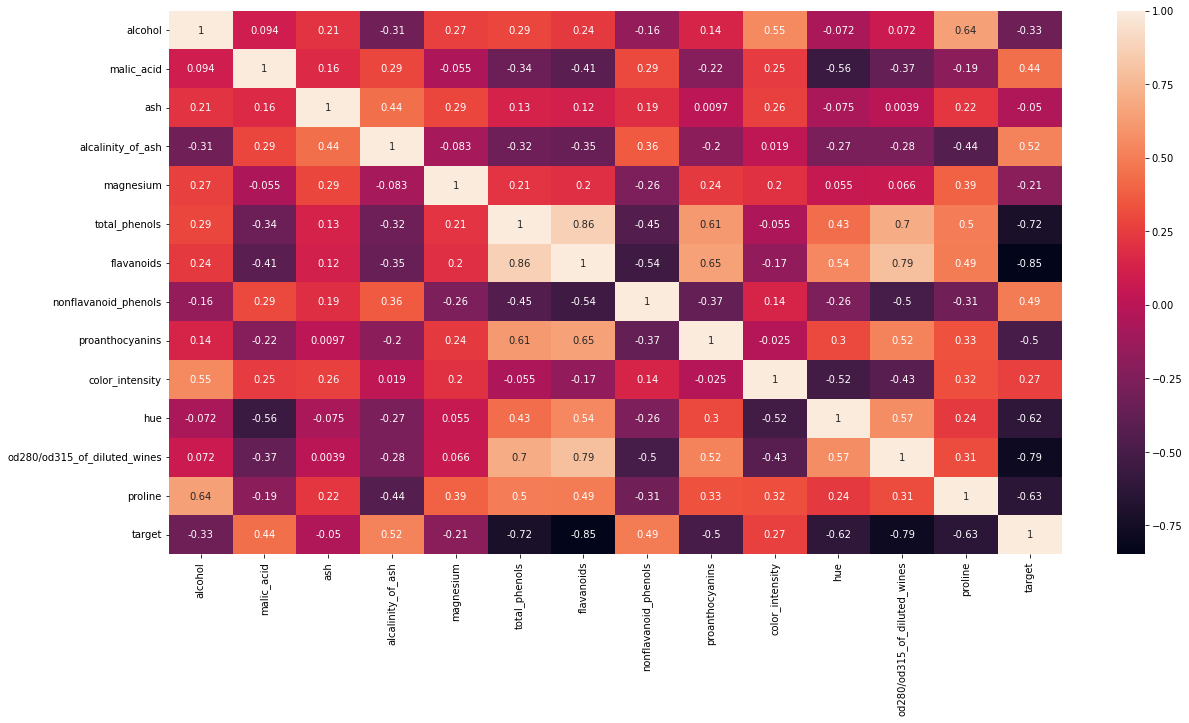

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot = True)

In [10]:
cols = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium','total_phenols', 'flavanoids', 'nonflavanoid_phenols','proanthocyanins', 'color_intensity', 'hue','od280/od315_of_diluted_wines', 'proline']

# kmeans


def make_kmeans(attributes=cols,scaler=MinMaxScaler(),dimension_reduction='pca',components=2,k=3,show='features'):
    attributes=list(attributes)
    scaled_values=scaler.fit_transform(df[attributes])
    X=df.values
    components = min(components, len(attributes))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    else:
        values=scaled_values
    
    cluster=KMeans(n_clusters=k).fit_predict(values)
    
    if show =='features':
        df_plot = pd.DataFrame(X.astype(float), columns=df.columns)
    elif show =='values':
        df_plot=pd.DataFrame(values)
    
    df_plot['cluster'] = cluster
        
    sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}, vars=[c for c in df_plot.columns if c != 'cluster'])
    

style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')
i = interact(make_kmeans, attributes=widgets.SelectMultiple(options=cols, value=cols, rows=len(cols),description='Features', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), scaler=widgets.RadioButtons(options=[ ('Z-Transform', StandardScaler()), ('Min-Max', MinMaxScaler()),('None', FunctionTransformer(validate=False))],description='Scaler', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'),('without', None)],description='Dimensionality Reduction', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), components=widgets.SelectionSlider(options=range(1, 5), value=4,description='PCA components', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), k=widgets.SelectionSlider(options=range(2, 8),description='k', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')],description='Show', layout=layout,style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True))
    

interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),…

In [11]:
# agglomerative


def make_Agglomerative(attributes=cols,scaler=MinMaxScaler(),dimension_reduction='pca',components=2,k=3,linkage='ward',show='features'):
    attributes=list(attributes)
    scaled_values=scaler.fit_transform(df[attributes])
    X=df.values
    
    components = min(components, len(attributes))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    else:
        values=scaled_values
    
    cluster=AgglomerativeClustering(n_clusters=k,linkage=linkage).fit_predict(values)
    
    if show =='features':
        df_plot = pd.DataFrame(X.astype(float), columns=df.columns)
    elif show =='values':
        df_plot=pd.DataFrame(values)
    
    df_plot['cluster'] = cluster
        
    sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}, vars=[c for c in df_plot.columns if c != 'cluster'])
    

style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')
i = interact(make_Agglomerative, attributes=widgets.SelectMultiple(options=cols, value=cols, rows=len(cols),description='Features', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), scaler=widgets.RadioButtons(options=[ ('Z-Transform', StandardScaler()), ('Min-Max', MinMaxScaler()), ('None', FunctionTransformer(validate=False))],description='Scaler', layout=layout, style=style ,disabled=False,continuous_update=False,orientation='horizontal',readout=True) , dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'), ('without', None)],description='Dimensionality Reduction', layout=layout, style=style ,disabled=False,continuous_update=False,orientation='horizontal',readout=True) ,linkage=widgets.RadioButtons(options=[('SINGLE', 'single'), ('COMPLETE', 'complete'),('AVERAGE', 'average'), ('WARD', 'ward')],description='Linkage', layout=layout, style=style ,disabled=False,continuous_update=False,orientation='horizontal',readout=True) , components=widgets.SelectionSlider(options=range(1, 5), value=4,description='PCA components', layout=layout, style=style,disabled=False,continuous_update=False, orientation='horizontal',readout=True), k=widgets.SelectionSlider(options=range(2, 8),description='k', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True)      , show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')],description='Show', layout=layout,style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True))
    

interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),…

In [12]:
# dbscan

def make_dbscan(attributes=cols, scaler=MinMaxScaler(), dimension_reduction=None, components=2, eps=.5,min_samples=5, show='features'):
    attributes=list(attributes)
    scaled_values=scaler.fit_transform(df[attributes])
    X=df.values
    
    components = min(components, len(attributes))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    else:
        values = scaled_values
 
    cluster = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(values)
    print('Found', 1+np.max(cluster), 'clusters with', np.sum(cluster == -1), 'outliers')
 
    if show == 'features':
        df_plot = pd.DataFrame(X.astype(float), columns=df.columns)
    elif show == 'values':
        df_plot = pd.DataFrame(values)
 
    df_plot['cluster'] = cluster
 
    sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}, vars=[c for c in df_plot.columns if c != 'cluster'])

style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')

i = interact(make_dbscan, attributes=widgets.SelectMultiple(options=cols, value=cols, rows=len(cols),description='Features', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), scaler=widgets.RadioButtons(options=[('Z-Transform', StandardScaler()), ('Min-Max', MinMaxScaler()), ('None', FunctionTransformer(validate=False))],description='Scaler', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'), ('without', None)],description='Dimensionality Reduction', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), components=widgets.SelectionSlider(options=range(1, 5), value=4,description='Number components', layout=layout,style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True)  , eps=widgets.SelectionSlider(options=[.1, .25, .5, .6, .7, .8, .9, 1., 1.25, 1.5, 2.], value = .5,description='Epsilon', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True)  , min_samples=widgets.SelectionSlider(options=range(1, 20), value=5,description='Min. samples', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True)  , show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')],description='Show', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True))

interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),…